/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


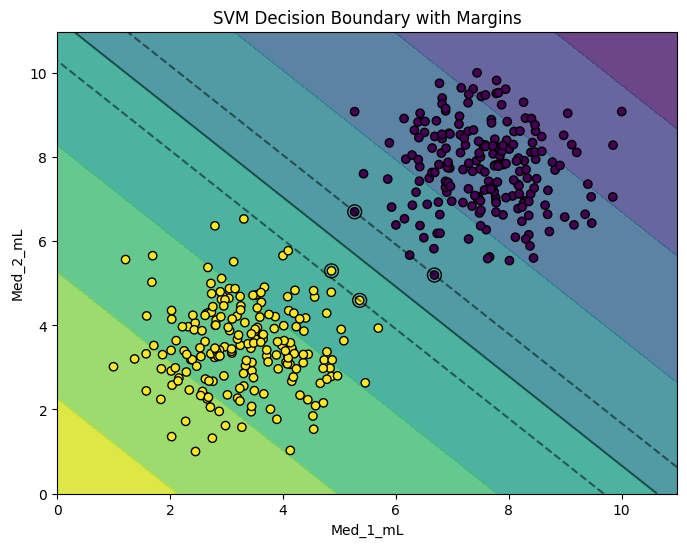

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("mouse_viral_study .csv")

# Select two features and the target variable
X = data[['Med_1_mL', 'Med_2_mL']]
y = data['Virus Present']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Build the SVM classifier
svm = SVC(kernel='linear')
svm.fit(X, y)

# Plot the decision boundary and margins
plt.figure(figsize=(8, 6))

# Set the plot limits based on feature ranges
x_min, x_max = X['Med_1_mL'].min() - 1, X['Med_1_mL'].max() + 1
y_min, y_max = X['Med_2_mL'].min() - 1, X['Med_2_mL'].max() + 1

# Generate a grid of points within the plot limits
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Compute the SVM decision function for each point on the grid
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and fill the regions
plt.contourf(xx, yy, Z, alpha=0.8)

# Scatter plot of the data points colored by the target variable
plt.scatter(X['Med_1_mL'], X['Med_2_mL'], c=y, edgecolors='k')

# Plot the support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Add contour lines to represent the decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Set labels and title for the plot
plt.xlabel('Med_1_mL')
plt.ylabel('Med_2_mL')
plt.title('SVM Decision Boundary with Margins')

# Display the plot
plt.show()


In [3]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.8 MB/s eta 0:00:00
